## Import libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import csv

## Download and unzip the file containing the dataset

In [ ]:
file = "dpt2020_txt.zip"
if(!file.exists(file)){
  download.file("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2020_csv.zip",
    destfile=file)
}
unzip(file)

In [9]:
import requests

print('Beginning file download with requests')

url = "https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2020_csv.zip"
r = requests.get(url)
print("done")


done


In [ ]:
import zipfile
with zipfile.ZipFile("dpt2020_csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

## Build the Dataframe from file

In [41]:
df = pd.read_csv('dpt2020.csv', delimiter=";")

In [42]:
df

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


In [51]:
gf = df.groupby(["preusuel", 'annais'])
gf.first()


sexe dpt  nombre
preusuel annais                  
A        XXXX       1  XX      27
AADAM    XXXX       1  XX      30
AADEL    XXXX       1  XX      56
AADIL    1983       1  84       3
         1992       1  92       3
...               ...  ..     ...
ÖZGE     XXXX       2  XX      31
ÖZGÜR    XXXX       1  XX      25
ÖZKAN    XXXX       1  XX      25
ÖZLEM    XXXX       2  XX     103
ÜMMÜ     XXXX       2  XX      20

[284257 rows x 3 columns]

In [152]:
sum_df = df.groupby(['preusuel','annais'], as_index=False).agg({'nombre': 'sum'})
#sum_df.loc[(sum_df["preusuel"]=='ERWAN')& (sum_df["annais"]=="2007") ]

sum_df

,preusuel,annais,nombre
0,A,XXXX,27
1,AADAM,XXXX,30
2,AADEL,XXXX,56
3,AADIL,1983,3
4,AADIL,1992,3
...,...,...,...
284252,ÖZGE,XXXX,31
284253,ÖZGÜR,XXXX,25
284254,ÖZKAN,XXXX,25
284255,ÖZLEM,XXXX,103


In [153]:

indexNames = sum_df[ sum_df['annais'] == "XXXX" ].index
# Delete these row indexes from dataFrame
sum_df.drop(indexNames , inplace=True)
sum_df

,preusuel,annais,nombre
3,AADIL,1983,3
4,AADIL,1992,3
6,AAHIL,2016,3
11,AALIYA,2017,3
13,AALIYAH,2001,9
...,...,...,...
284246,ÖMER,2016,18
284247,ÖMER,2017,30
284248,ÖMER,2018,31
284249,ÖMER,2019,37


In [154]:

sum_df = sum_df.astype({'annais': 'int64'})

In [132]:
def plotSpecName(name):

    specNamef = sum_df.loc[sum_df["preusuel"]== name ]
   
    plt.figure(figsize=(15, 5), dpi=80)
    list_annais = list(specNamef["annais"])
    plt.plot(list_annais , list(specNamef["nombre"]),'-bo' , color = 'g', label="nombre" )
    plt.xticks( np.arange(min(list_annais), max(list_annais)+1, int((max(list_annais)+1-min(list_annais))/10)))
    
    plt.ylabel("Number of perso named {}".format(name))
    plt.xlabel("Years")
    plt.title("Number of persons named '{}' per year".format(name))
    plt.legend()
    plt.show()


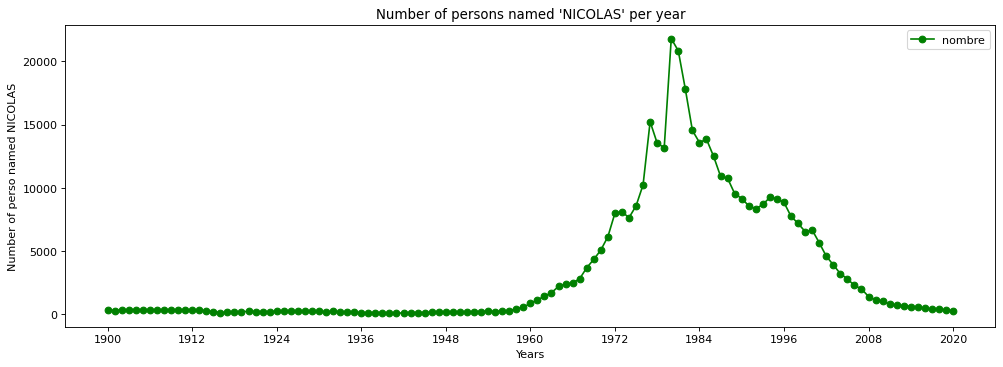

In [133]:
plotSpecName("NICOLAS")

In [185]:
sum_df = df.groupby(['annais','preusuel', "sexe"], as_index=False).nombre.sum()
# Delete these row indexes from dataFrame
indexNames = sum_df[ sum_df['annais'] == "XXXX" ].index
sum_df.drop(indexNames , inplace=True)

sum_df = sum_df.astype({'annais': 'int64'})


In [196]:
famousNameYearf  = sum_df.loc[sum_df.groupby(["annais", 'sexe'])["nombre"].idxmax()]
famousNameYearf  

,annais,preusuel,sexe,nombre
554,1900,JEAN,1,14097
679,1900,MARIE,2,48713
1614,1901,JEAN,1,15634
1754,1901,MARIE,2,52150
2717,1902,JEAN,1,16364
...,...,...,...,...
248797,2018,_PRENOMS_RARES,2,26513
253204,2019,_PRENOMS_RARES,1,25659
253205,2019,_PRENOMS_RARES,2,27330
257532,2020,_PRENOMS_RARES,1,26109


In [207]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())

In [210]:
def famousnameyear(sexe):
    
    famousNameYearSexef = famousNameYearf[famousNameYearf["sexe"]==sexe]    
    list_annais = list(famousNameYearSexef["annais"])
    plt.figure(figsize=(15, 5), dpi=80)
        
    plt.plot(list_annais , list(famousNameYearSexef["nombre"]),'-bo' , label="nombre", color=uniqueish_color())
    
    plt.xticks( np.arange(min(list_annais), max(list_annais)+1, int((max(list_annais)+1-min(list_annais))/6)))

    plt.ylabel("Number of the most given name")
    plt.xlabel("Years")
    plt.title("Number of persons named '{}' per year".format(name))
    plt.legend()
    plt.show()


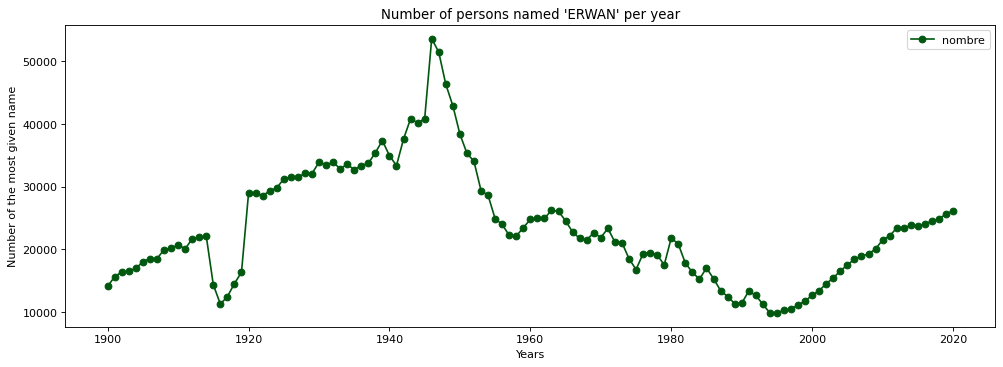

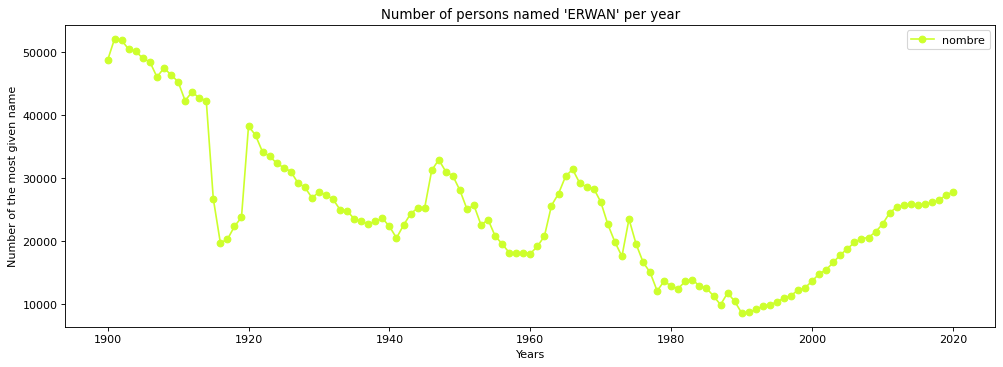

In [213]:
famousnameyear(1)
famousnameyear(2)